<a href="https://colab.research.google.com/github/azizdafi/Cloud-Cover-Detection/blob/main/Cloud_Cover_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cloud Cover Detection



# **GitHub Link -**

[Github Link](https://github.com/azizdafi/Cloud-Cover-Detection)

# **Problem Statement**


**Create a Vision Transformer (ViT) based model capable of accurately identifying and effectively masking clouds in multispectral satellite imagery, per pixel. These models should significantly elevate the quality of input data for Earth surface analysis, specifically benefiting analytical tasks reliant on accurate cloud removal and detection.**

Link to the dataset in multiple forms, as well as reference paper :
https://www.kaggle.com/datasets/hmendonca/cloud-cover-detection

# ***Let's Begin !***



## ***1. Understanding Kaggle Data***

### Required installations

In [1]:
# Installing required Libraries
!pip install -q kaggle
!pip install rasterio
!pip install xarray-spatial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59413 sha256=18eaa630a88a42089698e872b058369125e6c2cd9c642195088870464288566b
  Stored in directory: /root/.cache/pip/wheels/35/c6/63/a3c12ecc9fdea10a593271de5c56481b427ad4049b90a176e1
Successfully built datashape
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno



#setting font size throughout the notebook
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(18, 6))

# libraries for images processing and eda
import glob
import rasterio
from PIL import Image
import xarray as xr
import xarray
from google.colab.patches import cv2_imshow
import xrspatial.multispectral as ms
from pathlib import Path




<Figure size 1800x600 with 0 Axes>

### Dataset Loading

In [3]:
# the below credentails are set to exire on 8th oct 2023, create your own credentails to execute the file.
# append the credentails content below within single quotes
json_credentials = '{"username":"azizdafi","key":"f9f762436373459b5feb81c467047ca5"}'

# create file kaggle.json and add the credentials to it.
cmd = """text_file = open("kaggle.json", "w+");text_file.write(json_credentials);text_file.close()"""
exec(cmd)
print("file created sucesfully")

# Load Dataset
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
print("json file moved to the destination folder")

# import the dataset from kaggel
!kaggle datasets download -d hmendonca/cloud-cover-detection
print("Data downloaded sucesfully \n extracting the data from downloaded zip file")

# unzip the downloaded file
!unzip cloud-cover-detection.zip
print("Unzip sucessfull, deleting  the zip file for memory optimization")

# remove the downloaded zip file to have optimize disc scpace
!rm -rf cloud-cover-detection.zip
print("zip file deleted sucessfully")

Streaming output truncated to the last 5000 lines.
  inflating: data/train_labels/phfl.tif  
  inflating: data/train_labels/phfr.tif  
  inflating: data/train_labels/phfv.tif  
  inflating: data/train_labels/phgh.tif  
  inflating: data/train_labels/phhg.tif  
  inflating: data/train_labels/phhx.tif  
  inflating: data/train_labels/phio.tif  
  inflating: data/train_labels/phje.tif  
  inflating: data/train_labels/phjk.tif  
  inflating: data/train_labels/phlf.tif  
  inflating: data/train_labels/phli.tif  
  inflating: data/train_labels/phlj.tif  
  inflating: data/train_labels/phmg.tif  
  inflating: data/train_labels/phmo.tif  
  inflating: data/train_labels/phnk.tif  
  inflating: data/train_labels/phog.tif  
  inflating: data/train_labels/phqs.tif  
  inflating: data/train_labels/phro.tif  
  inflating: data/train_labels/phss.tif  
  inflating: data/train_labels/phux.tif  
  inflating: data/train_labels/phwe.tif  
  inflating: data/train_labels/phwn.tif  
  inflating: data/train_l

### Dataset First View

In [4]:
# importing Train_meta file and parsing dates
# df = pd.read_csv("/content/train_metadata.csv")
df = pd.read_csv("/content/train_metadata.csv", parse_dates = ['datetime'])

df.head(10)

,chip_id,location,datetime,cloudpath
0,adwp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwp
1,adwu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwu
2,adwz,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwz
3,adxp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adxp
4,aeaj,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeaj
5,aeap,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeap
6,aebi,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aebi
7,aebu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aebu
8,aeej,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeej
9,aeey,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeey


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
x = df.shape
print(f'the meta file has {x[0]} rows and {x[1]} columns')

the meta file has 11748 rows and 4 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11748 entries, 0 to 11747
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   chip_id    11748 non-null  object             
 1   location   11748 non-null  object             
 2   datetime   11748 non-null  datetime64[ns, UTC]
 3   cloudpath  11748 non-null  object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 367.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_values = df.isna().sum()
print(missing_values)

chip_id      0
location     0
datetime     0
cloudpath    0
dtype: int64


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
print(df.columns)

Index(['chip_id', 'location', 'datetime', 'cloudpath'], dtype='object')


The metafile has chip_id that is unique for every row.  
location: the area/city of the data captured  
datetime: the time at wich it was recorded  
cloudpath: is the path of azure data location

In [10]:
# Dataset Describe
df.describe(include='all')

<ipython-input-10-1fb2dbb7a3f1>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,chip_id,location,datetime,cloudpath
count,11748,11748,11748,11748
unique,11748,81,91,11748
top,adwp,Chifunfu,2020-09-06 15:02:37+00:00,az://./train_features/adwp
freq,1,341,261,1
first,NaN,NaN,2018-03-07 08:46:02+00:00,NaN
last,NaN,NaN,2020-09-14 08:28:49+00:00,NaN


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable and listing values whose count is less than 25
for column in df.columns:
  res = len(df[column].unique())
  print(f"The number of unique variables in {column} column are: {res}")

The number of unique variables in chip_id column are: 11748
The number of unique variables in location column are: 81
The number of unique variables in datetime column are: 91
The number of unique variables in cloudpath column are: 11748


## 3. ***Data Wrangling***

### Data Wrangling Code

from the give datetime column, I have extracted date, hour, year, month for EDA purpose to understand the pattern in data collection.

In [12]:
# generating features from the meta data
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

the below code is writen to map all the relavant bands file and paths and append un the data frame for better understanding and for further development of the model.

image paths are appended based on pattern of folder structure

In [13]:
# creating paths to the different bands of images
img_bands = ["B02", "B03", "B04", "B08"]

def add_paths(df, feature_dir, label_dir=None, bands=img_bands):
  "this function generates paths to the bands of file and adds to the dataframe"
  for band in bands:
    paths = []
    for x in df["chip_id"]:
      paths.append(f"{feature_dir}/{x}/{band}.tif")
    df[f"{band}_path"] = paths

    if label_dir is not None:
      label_paths = []
      for x in df["chip_id"]:
        label_paths.append(f"{label_dir}/{x}.tif")
      df["label_path"] = label_paths

add_paths(df, "/content/data/train_features", "/content/data/train_labels", img_bands)
df.head()


,chip_id,location,datetime,cloudpath,date,hour,year,month,B02_path,label_path,B03_path,B04_path,B08_path
0,adwp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwp,2020-04-29,8,2020,4,/content/data/train_features/adwp/B02.tif,/content/data/train_labels/adwp.tif,/content/data/train_features/adwp/B03.tif,/content/data/train_features/adwp/B04.tif,/content/data/train_features/adwp/B08.tif
1,adwu,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwu,2020-04-29,8,2020,4,/content/data/train_features/adwu/B02.tif,/content/data/train_labels/adwu.tif,/content/data/train_features/adwu/B03.tif,/content/data/train_features/adwu/B04.tif,/content/data/train_features/adwu/B08.tif
2,adwz,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adwz,2020-04-29,8,2020,4,/content/data/train_features/adwz/B02.tif,/content/data/train_labels/adwz.tif,/content/data/train_features/adwz/B03.tif,/content/data/train_features/adwz/B04.tif,/content/data/train_features/adwz/B08.tif
3,adxp,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/adxp,2020-04-29,8,2020,4,/content/data/train_features/adxp/B02.tif,/content/data/train_labels/adxp.tif,/content/data/train_features/adxp/B03.tif,/content/data/train_features/adxp/B04.tif,/content/data/train_features/adxp/B08.tif
4,aeaj,Chifunfu,2020-04-29 08:20:47+00:00,az://./train_features/aeaj,2020-04-29,8,2020,4,/content/data/train_features/aeaj/B02.tif,/content/data/train_labels/aeaj.tif,/content/data/train_features/aeaj/B03.tif,/content/data/train_features/aeaj/B04.tif,/content/data/train_features/aeaj/B08.tif


In [14]:
# exporting df as a backup
df.to_csv('dataframe.csv', index=False)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

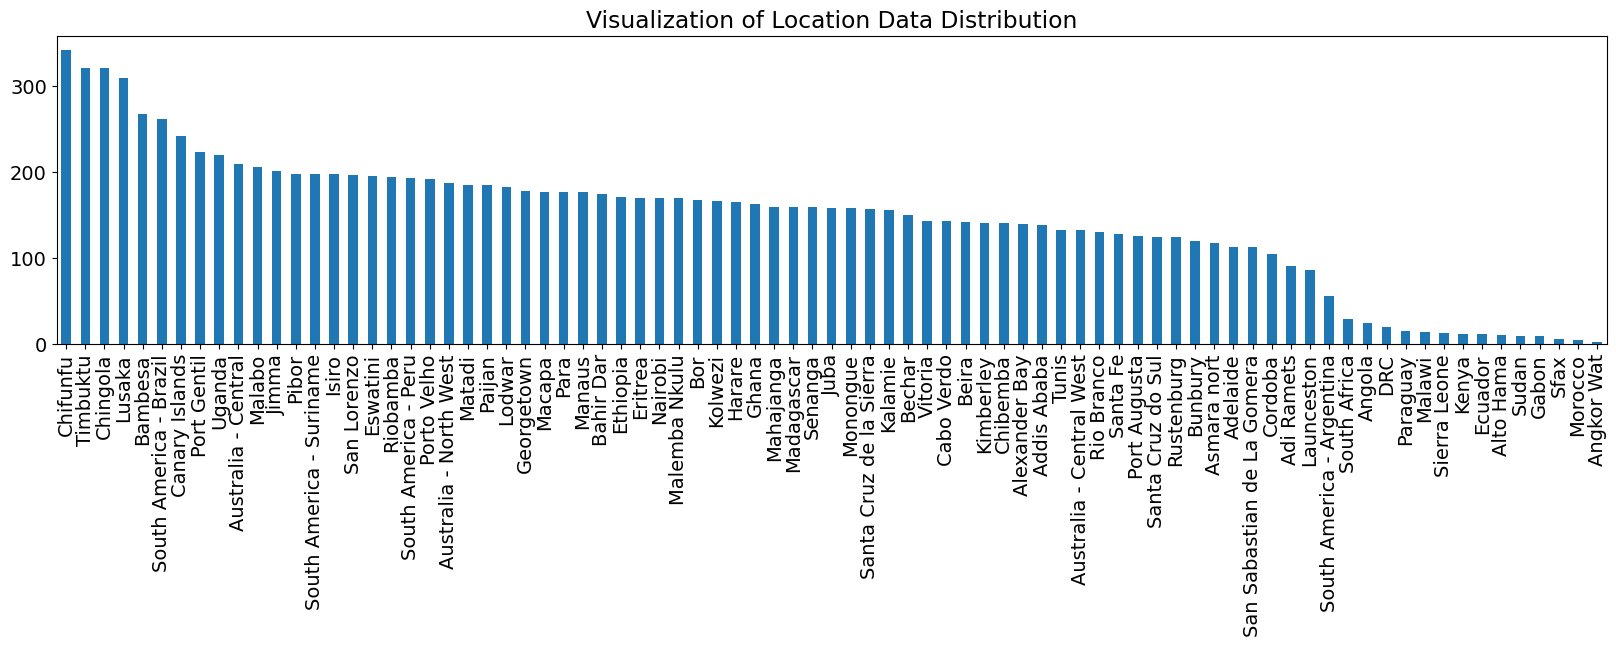

In [15]:
# Chart - 1  "Visualization of Location Data Distribution"

plt.figure(figsize=(20, 4))
df['location'].value_counts().plot.bar()
plt.title('Visualization of Location Data Distribution')
plt.show()

In [16]:
# top 5
df['location'].value_counts().head()

Chifunfu    341
Timbuktu    321
Chingola    321
Lusaka      309
Bambesa     267
Name: location, dtype: int64

In [17]:
# bottom 5
df['location'].value_counts().sort_values(ascending=True).head()

Angkor Wat    2
Morocco       4
Sfax          6
Gabon         9
Sudan         9
Name: location, dtype: int64

##### 2. What is/are the insight(s) found from the chart?

It is observed that most of the images were captured at location Chifunfi and least numbers were of angkor wat

#### Chart - 2

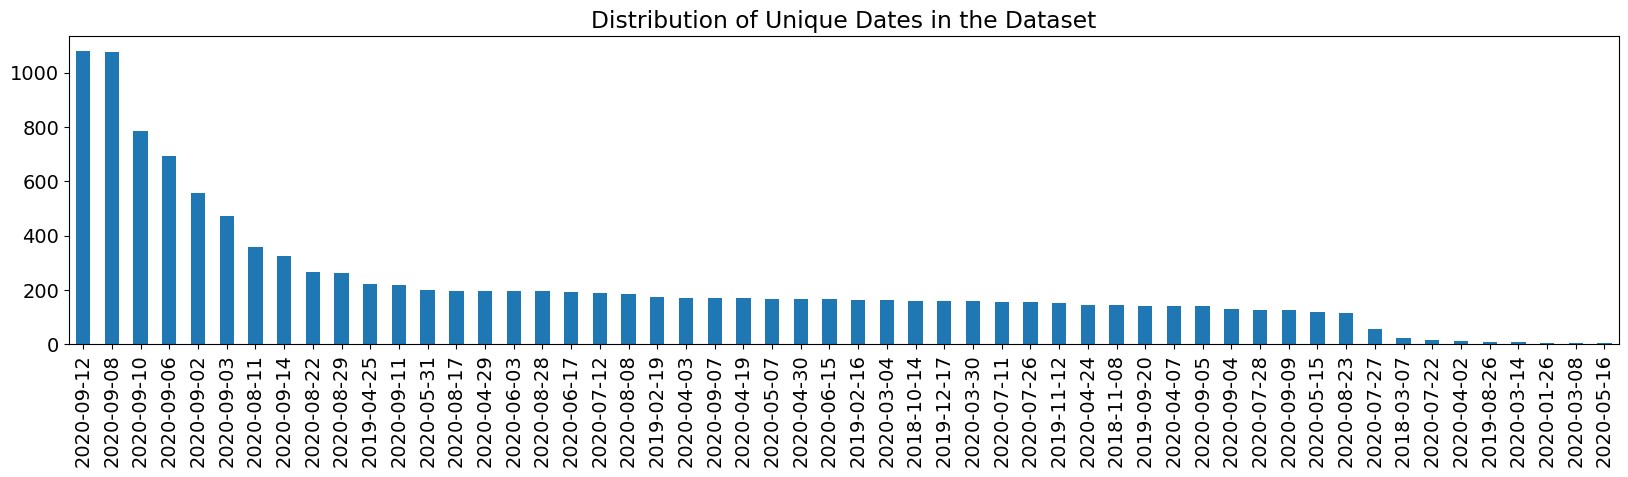

In [18]:
# Chart - 2 Distribution of Unique Dates in the Dataset
plt.figure(figsize=(20, 4))
df['date'].value_counts().plot.bar()
plt.title(f'Distribution of Unique Dates in the Dataset')
plt.show()

In [19]:
print("top 5 dates of most captured data")
df['date'].value_counts().head(5)

top 5 dates of most captured data


2020-09-12    1080
2020-09-08    1074
2020-09-10     783
2020-09-06     693
2020-09-02     555
Name: date, dtype: int64

In [20]:
# bottom 5
print("bottom 5 dates of most captured data")
df['date'].value_counts().sort_values(ascending=True).head(5)


bottom 5 dates of most captured data


2020-05-16    4
2020-03-08    6
2020-01-26    6
2020-03-14    9
2019-08-26    9
Name: date, dtype: int64

The mininmum number of data captured was 4 on 2020-05-16 and maximum was captured on 2020-09-12 that is 1080

####Chart-3

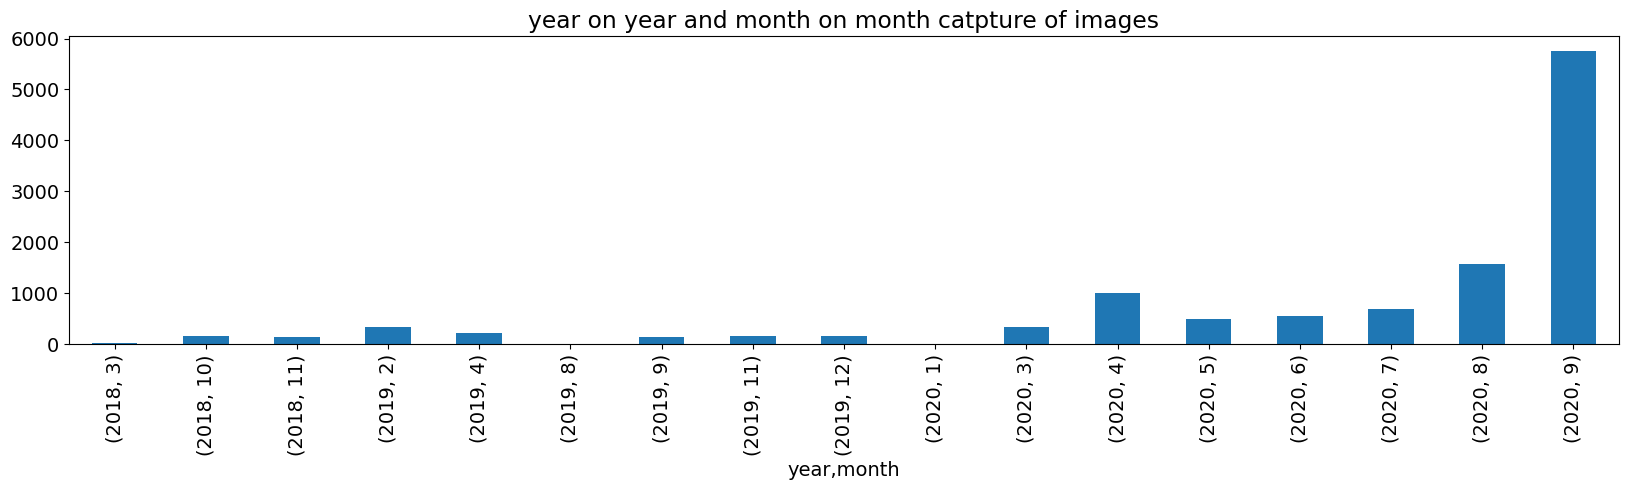

In [21]:
plt.figure(figsize=(20, 4))
df.groupby(['year', 'month']).month.count().plot(kind='bar', stacked=True)
plt.title(f'year on year and month on month catpture of images')
plt.show()

the graph shows the year on year number of captured rows.   
it is very evident that from march 2020 the data is captured more.

#### Chart - 4

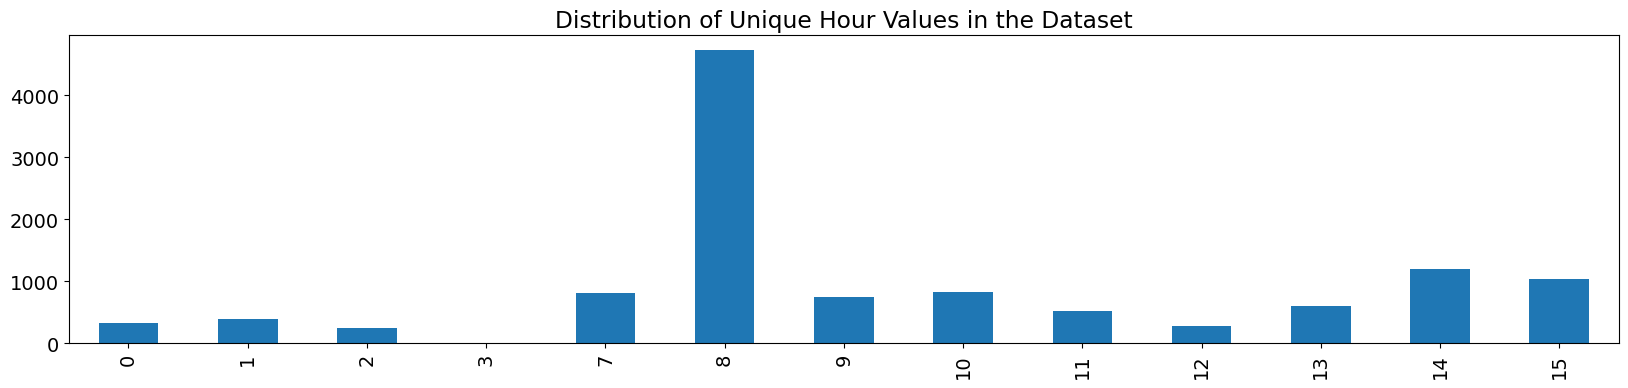

In [22]:
# Chart - 4 Distribution of Unique Hour Values in the Dataset
plt.rcParams['figure.figsize'] = (20,4)
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title(f'Distribution of Unique Hour Values in the Dataset')
plt.show()

In [23]:
print("Top 5 hours where most of the images were Taken")
df['hour'].value_counts().head(5)

Top 5 hours where most of the images were Taken


8     4733
14    1202
15    1039
10     827
7      810
Name: hour, dtype: int64

It is found post of the data is captured at 8am followed by 2pm amd 3 pm

#### Chart - 5

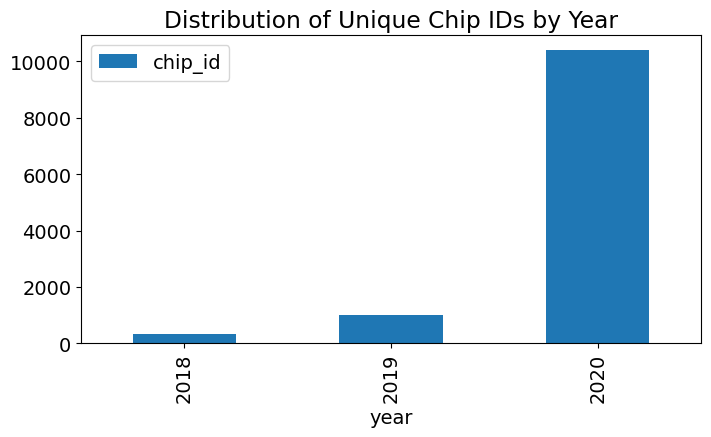

In [24]:
# Chart - 5 Distribution of Unique Chip IDs by Year
plt.rcParams['figure.figsize'] = (8,4)
df.groupby("year")[["chip_id"]].nunique().sort_index().plot.bar()
plt.title('Distribution of Unique Chip IDs by Year')
plt.show()

In [25]:
df.groupby("year")[["chip_id"]].nunique().sort_index(ascending = False).head()

,chip_id
year,
2020,10407
2019,1015
2018,326


chart represents the number of images that were captured with respect to various years.

#### Chart - 6

<Axes: >

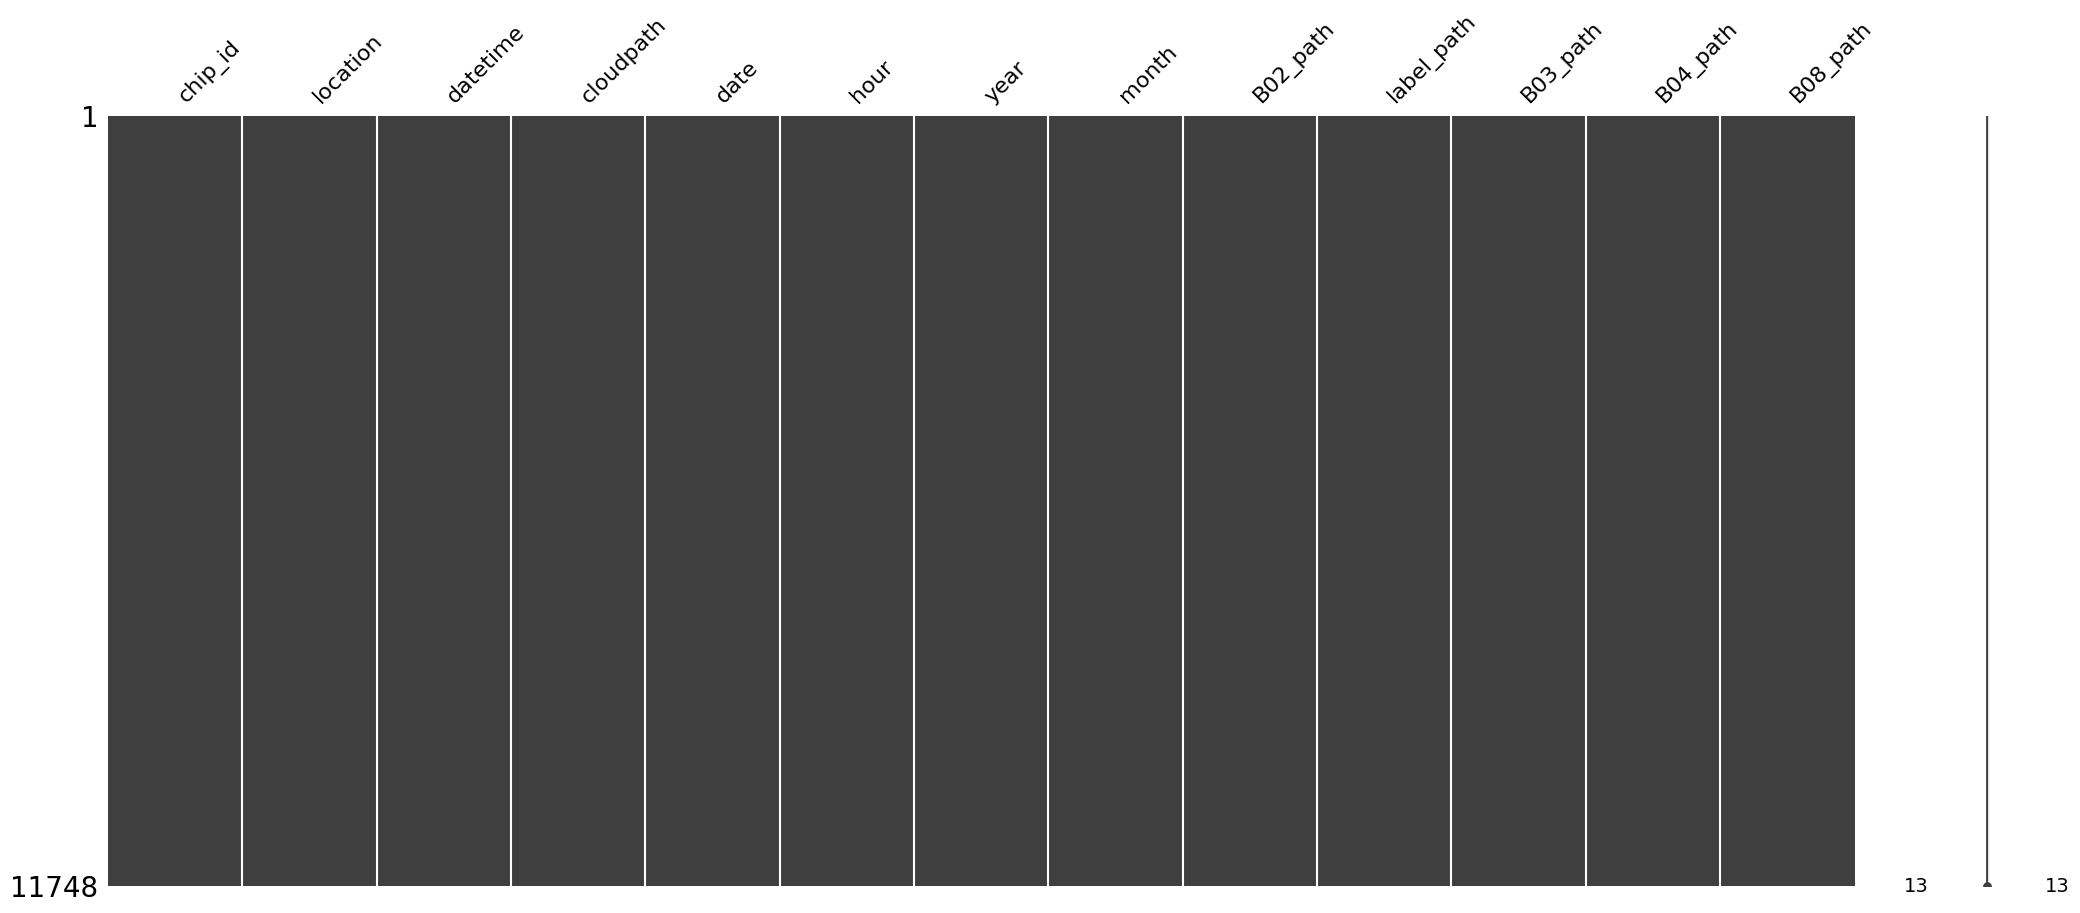

In [26]:
# Chart - 6 visualization code
# print(df.isna().sum())
# visualization of the df for missing values
msno.matrix(df)

No missing values are found.

#### Chart - 7

In [27]:
# Chart - 7 visualization code

# counting number of train features and files in the directories
print(f'Number of train features are {len(glob.glob("data/train_features/*"))}')
#
print(f'number of files prestent in each train features folders = {len(glob.glob("data/train_features/*/*"))}')

Number of train features are 11748
number of files prestent in each train features folders = 46992


In [28]:
len(glob.glob("data/train_features/*"))*len(img_bands) == len(glob.glob("data/train_features/*/*"))

True

It is found that the count of images in the train features and number of files in the folers are exactly 4 times more.


**It means all the lables have 4 images for the train feature.**

In [29]:
# taking a random sample to make further visualization wrt images and paths
sample_chip = df.sample(1)
sample_chip = sample_chip.iloc[0]

In [30]:
# sample data look
sample_chip

chip_id                                            kgsm
location                                       Eswatini
datetime                      2020-09-12 07:57:18+00:00
cloudpath                    az://./train_features/kgsm
date                                         2020-09-12
hour                                                  7
year                                               2020
month                                                 9
B02_path      /content/data/train_features/kgsm/B02.tif
label_path          /content/data/train_labels/kgsm.tif
B03_path      /content/data/train_features/kgsm/B03.tif
B04_path      /content/data/train_features/kgsm/B04.tif
B08_path      /content/data/train_features/kgsm/B08.tif
Name: 4455, dtype: object

#### Chart - 8

In [31]:
# Chart - 7 visualization code
# extracting metadata from the sample
with rasterio.open(sample_chip["B02_path"]) as img:
  chip_metadata = img.meta
  img_array = img.read(1)

chip_metadata

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 512,
 'height': 512,
 'count': 1,
 'crs': CRS.from_epsg(32736),
 'transform': Affine(10.0, 0.0, 482245.0,
        0.0, -10.0, 7095710.0)}

#### Chart - 9

In [32]:
# getting Longitude and latitude of the sample chip
with rasterio.open(sample_chip["B02_path"]) as img:
  Longitude, Latitude = img.lnglat()
  # bounds = img.bounds
print(f"Longitude: {Longitude}, Longitude: {Latitude}")

Longitude: 32.8478036792746, Longitude: -26.28133992302474


#### Chart - 10

In [33]:
# getting shape of the sample image
with rasterio.open(sample_chip["B08_path"]) as img:
  img_array = img.read(1)

print("Image array shape:", img_array.shape)

Image array shape: (512, 512)


#### Chart - 11

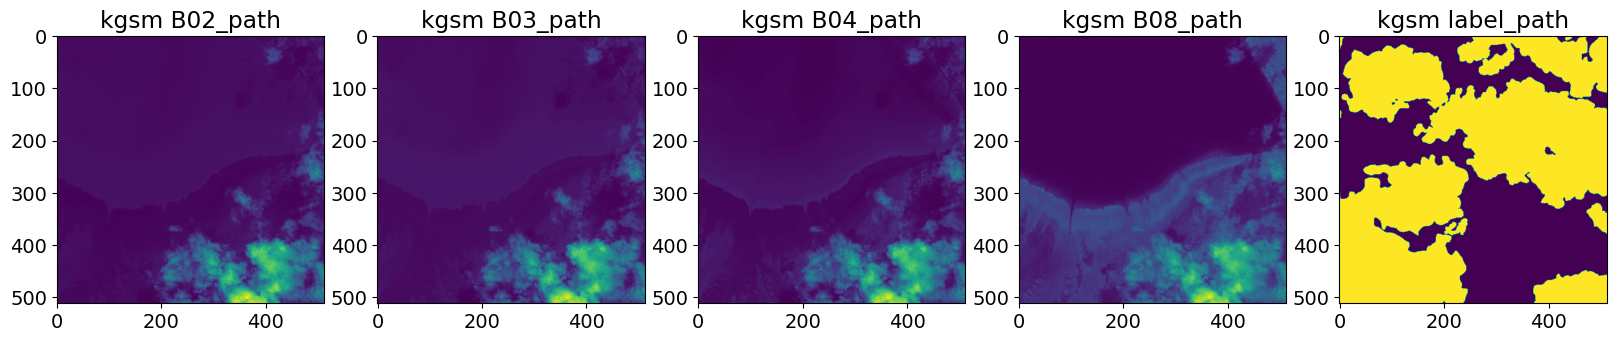

In [36]:
# ploting all the related files related to the example chip.
paths = ['B02_path', 'B03_path', 'B04_path', 'B08_path', 'label_path']
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, j in enumerate(paths):
  with rasterio.open(sample_chip[j]) as img:
    img_array = img.read(1)
    axes[i].imshow(img_array)
    axes[i].set_title(f'{sample_chip.chip_id} {j}')

plt.show()


#### Chart - 12

In [37]:
def get_xarray(filepath):
  im_arr = np.array(Image.open(filepath))
  return xarray.DataArray(im_arr, dims=["y", "x"])


def true_color_img(chip_id, data_dir="data/train_features"):
  """Given the path to the directory of Sentinel-2 chip feature images,
    plots the true color image"""
  chip_dir = Path(data_dir) / chip_id
  red = get_xarray(chip_dir / "B04.tif")
  green = get_xarray(chip_dir / "B03.tif")
  blue = get_xarray(chip_dir / "B02.tif")

  return ms.true_color(r=red, g=green, b=blue)

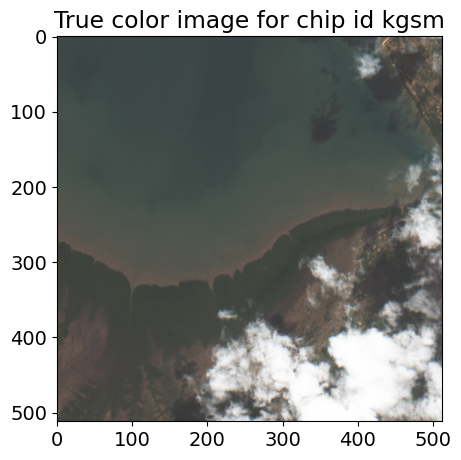

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
im = true_color_img(sample_chip.chip_id)
ax.imshow(im)
plt.title(f"True color image for chip id {sample_chip.chip_id}")
plt.show()

#### Chart - 13

In [39]:
# Displaying random chip
def display_random_chip(random_state):
  """Displays a true color image and the corresponding label for that chip"""
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))
  random_chip = df.sample(random_state=random_state).iloc[0]
  ax[0].imshow(true_color_img(random_chip.chip_id))
  ax[0].set_title(f"Chip {random_chip.chip_id}\n(Location: {random_chip.location})")
  label_im = get_xarray(random_chip.label_path)
  ax[1].imshow(label_im)
  ax[1].set_title(f"Chip {random_chip.chip_id} label")
  plt.show()

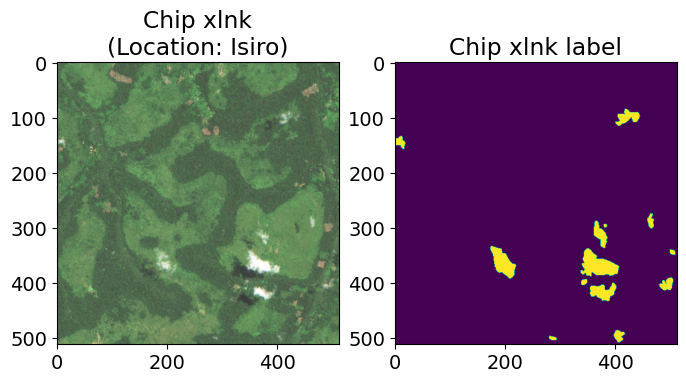

In [41]:
display_random_chip(np.random.randint(10000))

In [42]:
def display_random_chip_bands(chip_id='none', random_state=1):
    """Displays a true color image, B02 band, B03 band, B04 band, B08 band and the corresponding label for that chip"""
    fig, ax = plt.subplots(1, 6, figsize=(20, 10))
    if chip_id == 'none':
        chip_id = df.sample(random_state=random_state).iloc[0]
    else:
        chip_id = df.loc[df['chip_id'] == chip_id].iloc[0]
    true_color = true_color_img(chip_id.chip_id)
    ax[0].imshow(true_color)
    ax[0].set_title(f'{chip_id.chip_id}')

    for i, band in enumerate(img_bands, 1):
        datarray = get_xarray(f'/content/data/train_features/{chip_id.chip_id}/{band}.tif')
        ax[i].imshow(datarray)
        ax[i].set_title(band)
    datarray = get_xarray(f'/content/data/train_labels/{chip_id.chip_id}.tif')
    ax[5].imshow(datarray)
    ax[5].set_title(f'label, {round(float(datarray.mean().data), 2)}')

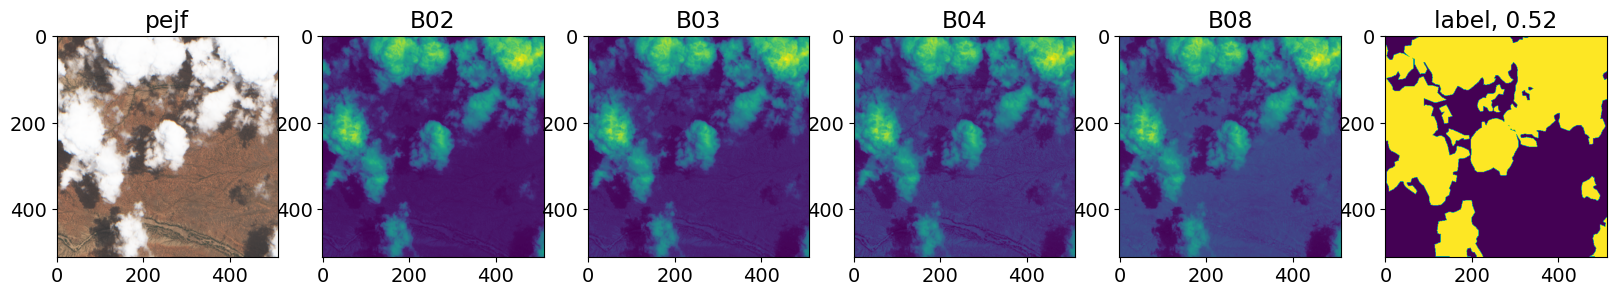

In [45]:
display_random_chip_bands(random_state = np.random.randint(1000))

## ***7. ML Model Implementation***

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***